# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


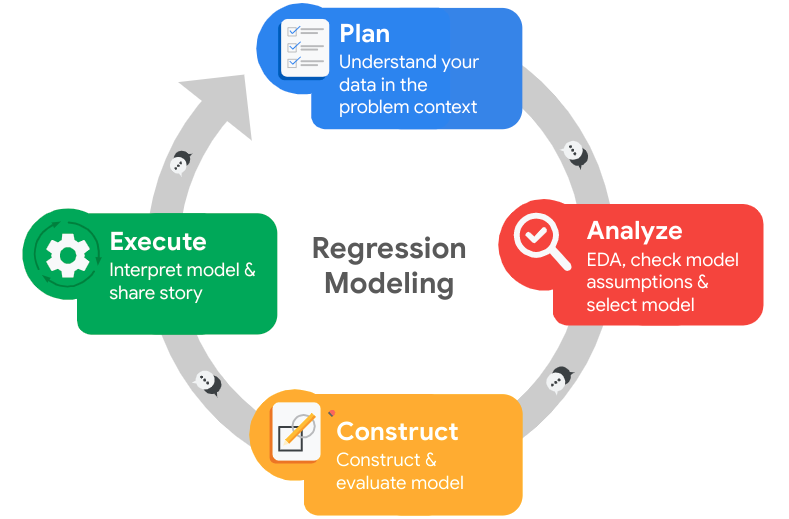

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




> * the stakeholders for this project is the HR department at Salifort Motors;  
* to analyze the data on employees to find out what factors contribute to employee deciding to leave the company and to build a model that predicts whether or not an employee will leave the company;  
* initial observations from exploring the data:  
  ** there are 10 columns in the dataset - 8 numeric and 2 of type object;  
  ** there are 5 categorical columns - 'work_accident', 'left', 'promotion_last_5years', 'department', 'salary';  
  ** there are no missing values in the dataset but there are 3008 duplicate rows;  
  ** after removing duplicates the proportion of the employees who left the company is 17%. The data is imbalanced, but    as the proportion of target value is above 10% it is not critical;    
  ** out of all the columns only 'tenure_in_years' contains outliers on the right side.  
* pandas official documentation;  
* the company is interested in increasing the satisfaction level of employees and in reducing the turnover rate. The analysis and the resulting model are going to be beneficial for both the employees and the company. So there are no ethical concerns regarding this project

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
def full_description(df):
    temp=pd.concat([
        df.describe().T,
        df.nunique(),
        df.isnull().mean()
    ], axis=1).rename(columns={0:'nunique', 1:'null_pct'})
    
    iqr=temp['75%']-temp['25%']

    temp['lbound']=temp['25%']-1.5*iqr
    temp['ubound']=temp['75%']+1.5*iqr
    return temp

In [5]:
# Gather descriptive statistics about the data
full_description(df0)

,count,mean,std,min,25%,50%,75%,max,nunique,null_pct,lbound,ubound
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0,92,0.0,-0.130,1.390
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0,65,0.0,0.095,1.335
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0,6,0.0,0.000,8.000
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0,215,0.0,22.500,378.500
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0,8,0.0,1.500,5.500
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0,2,0.0,0.000,0.000
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0,2,0.0,0.000,0.000
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0,2,0.0,0.000,0.000
Department,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0.0,NaN,NaN
salary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.0,NaN,NaN


In [6]:
def proportions(series):
    temp=pd.concat([
        series.value_counts(),
        series.value_counts(normalize=True).round(2)
    ], axis=1, keys=['freq', 'pct'])
    return temp

In [7]:
proportions(df0['left'])

,freq,pct
0,11428,0.76
1,3571,0.24


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename columns as needed
cols_renaming_dict={
    'number_project':'number_of_projects',
    'average_montly_hours':'avg_monthly_hours',
    'time_spend_company':'tenure_in_years',
    'Work_accident':'work_accident',
    'Department':'department'
}

df0.rename(columns=cols_renaming_dict, inplace=True)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'avg_monthly_hours', 'tenure_in_years', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
df0[df0.duplicated()].shape

(3008, 10)

In [11]:
# Inspect some rows containing duplicates as needed
dupes=df0[df0.duplicated(keep='last')].sort_values(by=list(df0.columns))

In [12]:
full_description(dupes)

,count,mean,std,min,25%,50%,75%,max,nunique,null_pct,lbound,ubound
satisfaction_level,3008.0,0.545765,0.266406,0.09,0.38,0.530,0.78,1.0,92,0.0,-0.22,1.38
last_evaluation,3008.0,0.713787,0.182012,0.36,0.54,0.725,0.88,1.0,65,0.0,0.03,1.39
number_of_projects,3008.0,3.803856,1.477272,2.00,2.00,4.000,5.00,7.0,6,0.0,-2.50,9.50
avg_monthly_hours,3008.0,203.349734,54.467101,97.00,151.00,204.000,253.00,310.0,207,0.0,-2.00,406.00
tenure_in_years,3008.0,4.029920,1.795619,2.00,3.00,3.000,5.00,10.0,8,0.0,0.00,8.00
work_accident,3008.0,0.106051,0.307953,0.00,0.00,0.000,0.00,1.0,2,0.0,0.00,0.00
left,3008.0,0.525266,0.499444,0.00,0.00,1.000,1.00,1.0,2,0.0,-1.50,2.50
promotion_last_5years,3008.0,0.038564,0.192585,0.00,0.00,0.000,0.00,1.0,2,0.0,0.00,0.00
department,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0.0,NaN,NaN
salary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.0,NaN,NaN


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_no_dupes=df0.drop_duplicates().copy()

# Display first few rows of new dataframe as needed
df_no_dupes.head()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,tenure_in_years,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df_no_dupes.shape

(11991, 10)

In [15]:
df_full_desc=full_description(df_no_dupes)
df_full_desc

,count,mean,std,min,25%,50%,75%,max,nunique,null_pct,lbound,ubound
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0,92,0.0,-0.030,1.330
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0,65,0.0,0.135,1.295
number_of_projects,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0,6,0.0,0.000,8.000
avg_monthly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0,215,0.0,28.000,372.000
tenure_in_years,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0,8,0.0,1.500,5.500
work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0,2,0.0,0.000,0.000
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0,2,0.0,0.000,0.000
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0,2,0.0,0.000,0.000
department,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0.0,NaN,NaN
salary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.0,NaN,NaN


In [16]:
proportions(df_no_dupes['left'])

,freq,pct
0,10000,0.83
1,1991,0.17


### Check outliers

Check for outliers in the data.

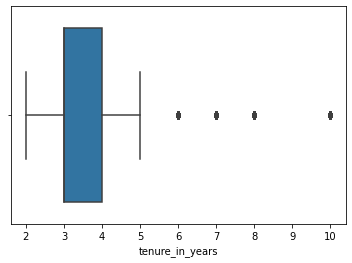

In [17]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df_no_dupes['tenure_in_years']);

In [18]:
tenure_lbound, tenure_ubound=df_full_desc.loc['tenure_in_years', ['lbound', 'ubound']]

In [19]:
# Determine the number of rows containing outliers
tenure_outliers="tenure_in_years<@tenure_lbound or tenure_in_years>@tenure_ubound"
df_no_dupes.query(tenure_outliers).sort_values(by=['tenure_in_years'])

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,tenure_in_years,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
8062,0.24,0.91,5,258,6,0,0,0,support,low
8027,0.86,0.79,3,106,6,1,0,0,sales,medium
8022,0.98,0.98,5,210,6,0,0,0,sales,low
7993,0.17,0.60,5,144,6,0,0,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
11613,0.56,0.85,3,265,10,1,0,0,management,low
11619,0.57,0.91,4,224,10,0,0,0,sales,medium
11620,0.63,0.65,3,190,10,0,0,0,sales,medium
11580,0.51,0.86,3,182,10,0,0,0,sales,low


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)




💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**What did you observe about the relationships between variables?**  
* there is no strong linear correlation between the continuos explanatory variables;  
* there is a statistically significant association between the `left` column and every other categorical column;
* the p_value for association between `department` and `left` columns is lower compared to other categorical variables;
* the mean value of `last_evaluation` for terminated employees and those who stayed is statistically insignificant;
* the satisfaction level tends to be lower for employees who work on only 2 projects or those who work on more than 5 projects. And those employees are most likely to leave (>50%);  
* the satisfaction level drastically decreases for employees whose avg_monthly_hours are above 270;  

**What do you observe about the distributions in the data?**  
* the distribution of values in 'satisfaction_level' column is left-skewed, which means that the majority of employees expressed their satisfaction;  
* the distribution of values in 'avg_monthly_hours' column is centered around 200. It is multimodal and have fat tales. There is a threshold of 'avg_monthly_hours' between 165 and 215 hours where the proportion of the target value is very low. As the turnover data includes both employees who choose to quit their job and employees who are let go, I assume that employee terminations below that threshold are mostly the employees who were fired and employee terminations above that threshold are mostly the employees who quit;  
* the distribution of values in 'last_evaluation' is left-skewed with the majority of the employees being evaluated as above average. Again, there is a threshold between 6 and 7.5, and employees who were evaluated above this threshold are more likely to quit, while the employees who were evaluated below this threshold more likely to be fired;  
* the distribution of values in 'tenure_in_years' column is right-skewed with the majority of the employees having worked for less than 4 years. For the employees whose tenure is 6 years and above the proportion of termination is close to 0; 
* 5 years tenure seems to be the critical point for employees as the turnover rate for this tenure is 4 times higher compared to other tenures;  
* 15% of the employees in the given dataset had work accidents and their turnover rate is lower compared to other employees. As counterintuitive as it is the turnover rate of employees who had work accidents is 3 times lower compared to others;  
* 'RanD' and 'management' departments have almost equal turnover rate and it is lower compared to other departments;  
* there seems to exist a negative correlation between salary and turnover rate  

**What transformations did you make with your data? Why did you chose to make those decisions?**  
* as I plan to create the model using logistic regression I imputed `tenure_in_years` outliers;
* encoded 'salary' column to integer values

**What resources do you find yourself using as you complete this stage?**  
* pandas and seaborn official documentation, stackoverflow

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [20]:
# Get percentages of people who left vs. stayed
proportions(df_no_dupes['left'])

,freq,pct
0,10000,0.83
1,1991,0.17


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

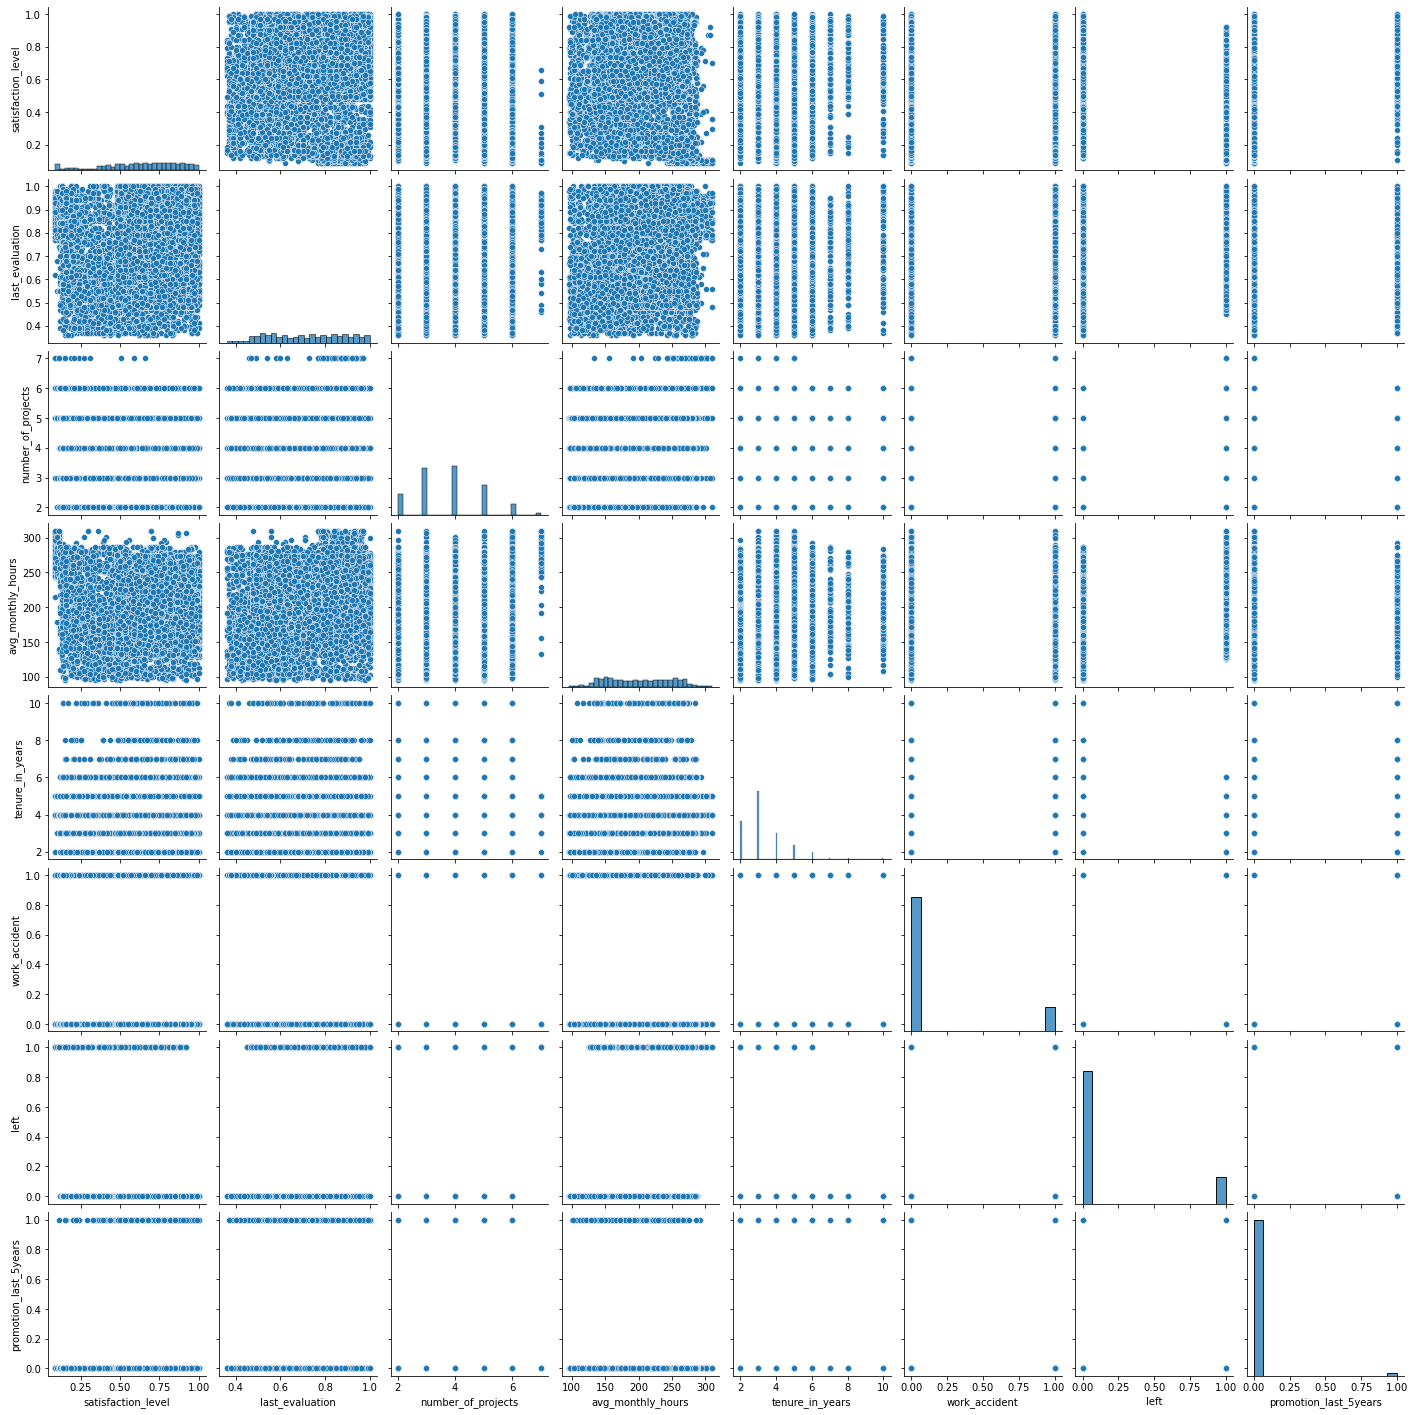

In [21]:
sns.pairplot(df_no_dupes);

In [22]:
cat_cols=['work_accident', 'promotion_last_5years', 'department', 'salary', 'left']
cat_cols

['work_accident', 'promotion_last_5years', 'department', 'salary', 'left']

In [23]:
def check_association(df, col1, col2, alpha=.05):
    from scipy.stats.contingency import chi2_contingency
    contingency_table=pd.crosstab(
        index=df[col1],
        columns=df[col2]
    )
    p_value=chi2_contingency(contingency_table)[1]
    return {
        'col1':col1, 
        'col2':col2, 
        'p_value':round(p_value,4)
    }

In [24]:
associations=[]
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1!=col2:
            associations.append(
                check_association(
                    df_no_dupes,
                    col1,
                    col2
                )
            )

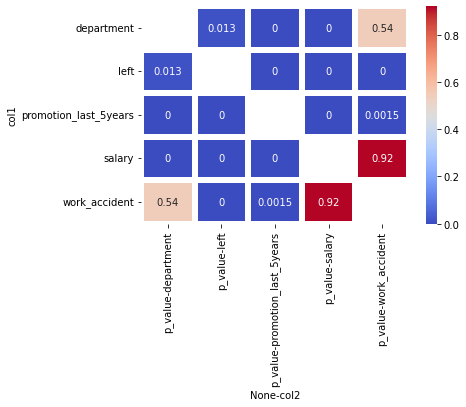

In [25]:
df_associations=pd.DataFrame(associations).sort_values(by=['p_value'])
associations_pivot=df_associations.pivot_table(
        index=['col1'],
        columns=['col2'],
        values=['p_value']
    )
sns.heatmap(
    associations_pivot,
    cmap='coolwarm',
    linecolor='white',
    linewidths=5,
    annot=True
);

>***Chi-squared test for independence shows that there are strong associations between the dependent and every other categorical independent variable. However, the p-value for `department` column is lower compared to other categorical variables, which means that this column has lower predictive power.***

In [26]:
cont_cols=['satisfaction_level', 'last_evaluation', 'number_of_projects', 
           'avg_monthly_hours', 'tenure_in_years']
cont_cols

['satisfaction_level',
 'last_evaluation',
 'number_of_projects',
 'avg_monthly_hours',
 'tenure_in_years']

In [27]:
def check_difference(df, target_col, cont_col):
    from scipy.stats import ttest_ind
    
    a=df[df[target_col]==0][cont_col]
    b=df[df[target_col]==1][cont_col]
    
    stat, p_value=ttest_ind(a, b, equal_var=False)
    return (target_col, cont_col, stat, round(p_value, 2))

In [28]:
stat_difference=[]
for col in cont_cols:
    stat_difference.append(
        check_difference(df_no_dupes, 'left', col)
    )

In [29]:
stat_difference

[('left', 'satisfaction_level', 35.88930498486623, 0.0),
 ('left', 'last_evaluation', -1.2980408875764917, 0.19),
 ('left', 'number_of_projects', -2.307798135702878, 0.02),
 ('left', 'avg_monthly_hours', -6.368796832309121, 0.0),
 ('left', 'tenure_in_years', -24.04980075660298, 0.0)]

>***the difference of mean values for `last_evaluation` of terminated employees and those who stayed, is statistically insignificant. This variable may have low predictive power, unless there are interaction terms with some other dependent variables.***

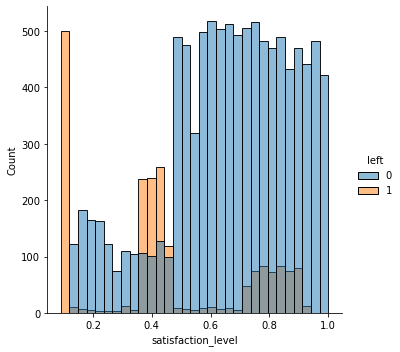

In [30]:
sns.displot(
    data=df_no_dupes,
    x='satisfaction_level',
    hue='left'
);

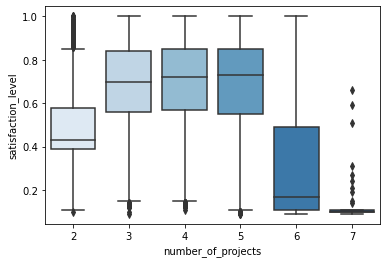

In [31]:
sns.boxplot(data=df_no_dupes, x='number_of_projects', y='satisfaction_level', palette='Blues');

In [32]:
proportions(df_no_dupes['number_of_projects'])

,freq,pct
4,3685,0.31
3,3520,0.29
5,2233,0.19
2,1582,0.13
6,826,0.07
7,145,0.01


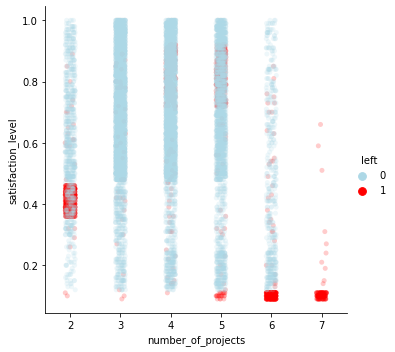

In [33]:
sns.catplot(
    kind='strip',
    data=df_no_dupes,
    x='number_of_projects',
    y='satisfaction_level',
    hue='left',
    palette=['lightblue', 'red'],
    alpha=.2,
);

> ***The satisfaction level tends to be lower for employees who work on only 2 projects or those who work on more than 5 projects. And those employees are most likely to leave.***

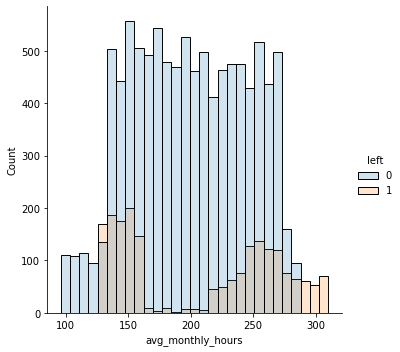

In [34]:
# Create a plot as needed
sns.displot(
    data=df_no_dupes,
    x='avg_monthly_hours',
    hue='left',
    alpha=.2,
);

> ***There is a threshold of 'avg_monthly_hours' between 165 and 215 hours where the proportion of the target value is very low. As the value goes above this threshold the proportion of terminated employees increases***

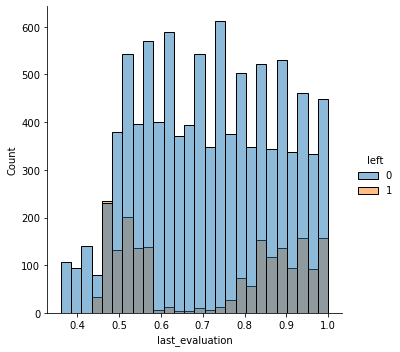

In [35]:
# Create a plot as needed
sns.displot(
    data=df_no_dupes,
    x='last_evaluation',
    hue='left'
);

> ***The distribution of values in 'last_evaluation' is right-skewed' with the majority of the employees being evaluated as above average. There is a threshold between 6 and 7.5, and employees who were evaluated above this threshold are more likely to quit, while the employees who were evaluated below this threshold more likely to be fired***

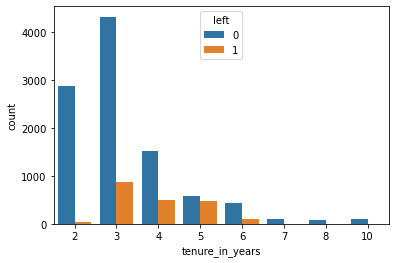

In [36]:
# Create a plot as needed
sns.countplot(
    data=df_no_dupes,
    x='tenure_in_years',
    hue='left',
);

In [37]:
proportions(df_no_dupes['tenure_in_years'])

,freq,pct
3,5190,0.43
2,2910,0.24
4,2005,0.17
5,1062,0.09
6,542,0.05
10,107,0.01
7,94,0.01
8,81,0.01


In [38]:
df_no_dupes['tenure_in_years']=np.where(
    df_no_dupes['tenure_in_years']>tenure_ubound,
    tenure_ubound,
    df_no_dupes['tenure_in_years']
)

In [39]:
df_no_dupes['tenure_in_years'].unique()

array([3. , 5.5, 4. , 5. , 2. ])

> ***The distribution of values in 'tenure_in_years' column is right-skewed with the majority of the employees having worked for less than 4 years. For the employees whose tenure is 6 years and above the proportion of termination is close to 0***

In [40]:
pd.concat([
    proportions(df_no_dupes.query("tenure_in_years<5")['left']),
    proportions(df_no_dupes.query("tenure_in_years==5")['left']),
    proportions(df_no_dupes.query("tenure_in_years>5")['left'])
], axis=1, keys=['<5', '5', '>5']).style.background_gradient(
    subset=[('5', 'pct')], 
    cmap=sns.diverging_palette(20, 150, as_cmap=True)
)

> ***5 years tenure seems to be the critical point for employees as the turnover rate for this tenure is 4 times higher compared to other tenures.*** 

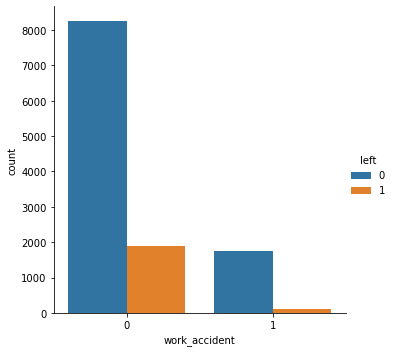

In [41]:
# Create a plot as needed
sns.catplot(
    kind='count',
    data=df_no_dupes,
    x='work_accident',
    hue='left'
);

In [42]:
df_no_dupes.groupby('work_accident')['left'].mean()

work_accident
0    0.185978
1    0.056757
Name: left, dtype: float64

In [43]:
proportions(df_no_dupes['work_accident'])

,freq,pct
0,10141,0.85
1,1850,0.15


> ***15% of the employees in the given dataset had work accidents and their turnover rate is lower compared to other employees. As counterintuitive as it is the turnover rate of employees who had work accidents is 3 times lower compared to others***

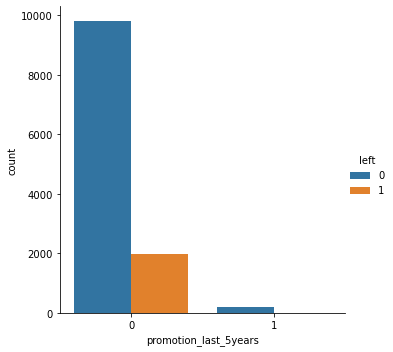

In [44]:
# Create a plot as needed
sns.catplot(
    kind='count',
    data=df_no_dupes,
    x='promotion_last_5years',
    hue='left',
);

In [45]:
proportions(df_no_dupes['promotion_last_5years'])

,freq,pct
0,11788,0.98
1,203,0.02


In [46]:
df_no_dupes['promotion_last_5years'].mean()

0.016929363689433742

> ***~1.7% of employees has been promoted for the last 5 years and the turnover rate of promoted employees is 0. Yet, proportion of the minority class (promoted) is so small that when splitting the dataset to training, validation and testing sets, there is a high probability that none of the minority class will be represented in the training set.***

In [47]:
df_no_dupes.groupby('department')['left'].mean().sort_values(ascending=False)

department
hr             0.188020
accounting     0.175523
technical      0.173797
support        0.171334
sales          0.169805
marketing      0.166419
IT             0.161885
product_mng    0.160350
RandD          0.122478
management     0.119266
Name: left, dtype: float64

In [48]:
proportions(df_no_dupes['department'])

,freq,pct
sales,3239,0.27
technical,2244,0.19
support,1821,0.15
IT,976,0.08
RandD,694,0.06
product_mng,686,0.06
marketing,673,0.06
accounting,621,0.05
hr,601,0.05
management,436,0.04


> ***'RanD' and 'management' departments have almost equal turnover rate and it is slightly lower compared to other departments***

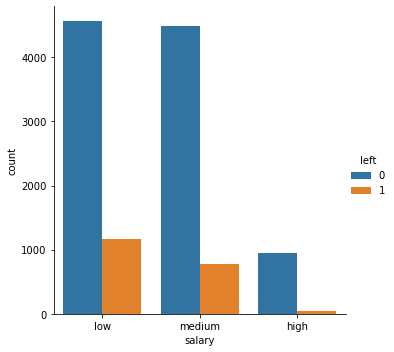

In [49]:
# Create a plot as needed
sns.catplot(
    kind='count',
    data=df_no_dupes,
    x='salary',
    hue='left'
);

In [50]:
df_no_dupes.groupby('salary')['left'].mean()

salary
high      0.048485
low       0.204530
medium    0.146170
Name: left, dtype: float64

In [51]:
proportions(df_no_dupes['salary'])

,freq,pct
low,5740,0.48
medium,5261,0.44
high,990,0.08


In [52]:
df_no_dupes['salary']=df_no_dupes['salary'].map({
    'low':1,
    'medium':2,
    'high':3
})

> ***there seems to exist a negative correlation between salary and turnover rate***

### Insights

* the satisfaction level tends to be lower for employees who work on only 2 projects or those who work on more than 5 projects. And those employees are most likely to leave (>50%);  
* there is a threshold of 'avg_monthly_hours' between 165 and 215 hours where turnover rate is very low. As the turnover data includes both employees who choose to quit their job and employees who are let go, I assume that employee terminations below that threshold are mostly the employees who were fired and employee terminations above that threshold are mostly the employees who quit;  
* there is a threshold between 6 and 7.5, and employees who were evaluated above this threshold are more likely to quit, while the employees who were evaluated below this threshold more likely to be fired;
* for the employees whose tenure is 6 years and above the proportion of termination is close to 0;  
* 5 years tenure seems to be the critical point for employees as the turnover rate for this tenure is 4 times higher compared to other tenures. And based on 'last_evaluation' values these are the most valuable specialists;  
* the turnover rate of employees who had work accidents is 3 times lower compared to others;  
* 'RanD' and 'management' departments have almost equal turnover rate and it is lower compared to other departments;  
* there seems to exist a negative correlation between salary and turnover rate

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model building

The course material contained information on the idea behind LogisticRegression, but it didn't dive on how to tweak hyperparameters to fine-tune the model. Yet Logistic Regression is considered one of the foundational algorithms in ML. That's why I decided to build the model using Logistic Regression. 

In [53]:
def normalizer(x):
    """returns MinMaxScale normalizer"""
    from sklearn.preprocessing import MinMaxScaler
    minmax=MinMaxScaler()
    minmax.fit(x)
    return minmax

In [54]:
def strip_n_encode(df, cols_to_drop):
    """drops unnecessary columns and encodes categorical variables"""
    temp=df.drop(labels=cols_to_drop, axis=1).copy()
    temp=pd.get_dummies(temp, drop_first=True)
    return temp

In [55]:
def split(df):
    """splits the dataset into variables/outcomes and training/validation/testing sets"""
    X=df.drop(labels=['left'], axis=1)
    y=df['left']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=.2, stratify=y, random_state=42
    )
    
    X_tr, X_val, y_tr, y_val = train_test_split(
        X_train, y_train, test_size=.25, random_state=42
    )
    
    return (X, X_train, X_test, X_tr, X_val, y, y_train, y_test, y_tr, y_val)

In [56]:
def preprocess(df, cols_to_drop):
    """preprocesses the dataset for modeling"""
    temp=strip_n_encode(df, cols_to_drop)
    return split(temp)

In [57]:
def get_vif(X):
    """calculates Variance Inflation Factor for the chosen variables"""
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=[
        variance_inflation_factor(X.values, i) for i in range(X.shape[1])
    ]
    data=list(zip(X, vif))
    return pd.DataFrame(data, columns=['variable', 'vif']).sort_values(
        by=['vif'],
        ascending=False
    )

In [58]:
def get_metrics(model, model_name, set, x, y):
    """returns evaluation metrics"""
    predictions=model.predict(x)
    
    metrics_dict={}
    metrics_dict['set']=set
    metrics_dict['recall']=metrics.recall_score(y, predictions)
    metrics_dict['precision']=metrics.precision_score(y, predictions)
    metrics_dict['f1']=metrics.f1_score(y, predictions)
    metrics_dict['accuracy']=metrics.accuracy_score(y, predictions)
    metrics_dict['roc_auc']=metrics.roc_auc_score(y, predictions)
    metrics_dict['cm']=metrics.confusion_matrix(y, predictions)    
    
    return pd.DataFrame(data=metrics_dict.values(), index=metrics_dict.keys(), columns=[model_name])

In [59]:
def rank_features(X, ranks):
    """returns feature importanse table"""
    return pd.DataFrame({
        'feature':X.columns, 
        'importance':ranks
    }).sort_values(by=['importance'], ascending=False)

In [60]:
def model_n_evaluate(model, model_name, cols_to_drop):
    X, X_train, X_test, X_tr, X_val, y, y_train, y_test, y_tr, y_val = preprocess(
        df_no_dupes, cols_to_drop)
    print(get_vif(X), end='\n\n')
    
    minmax=normalizer(X_tr)
    X_tr=minmax.transform(X_tr)
    model.fit(X_tr, y_tr)
    
    model_metrics=get_metrics(model, model_name, 'val', minmax.transform(X_val), y_val)
    print(model_metrics, end='\n\n')
    
    features_ranks=rank_features(X, np.abs(model.coef_[0]))
    print(features_ranks)

In [61]:
base=LogisticRegression(random_state=42)

In [62]:
cols_to_drop=['department', 'promotion_last_5years']
model_n_evaluate(base, 'base', cols_to_drop)

             variable        vif
1     last_evaluation  19.353560
3   avg_monthly_hours  18.526526
2  number_of_projects  13.938819
4     tenure_in_years  10.135764
0  satisfaction_level   7.003142
6              salary   6.491573
5       work_accident   1.180847

                              base
set                            val
recall                    0.171694
precision                 0.496644
f1                        0.255172
accuracy                   0.81985
roc_auc                   0.566782
cm         [[1892, 75], [357, 74]]

              feature  importance
0  satisfaction_level    3.256894
4     tenure_in_years    2.011199
2  number_of_projects    1.529360
5       work_accident    1.460490
6              salary    1.298166
3   avg_monthly_hours    0.764293
1     last_evaluation    0.415430


> ***vif values from the summary table show that `last_evaluation` and `avg_monthly_hours` violate the `no_severe_multicollinearity` assumption and based on the coefficients they also have small importance as predictors. It is clear now that `last_evaluation` is a bad predictor. But the difference of means of `avg_monthly_hours` was statistically significant, so instead of removing it, I decided to create a new variable `high_workload`.***

In [63]:
df_no_dupes['high_workload']=np.where(
    df_no_dupes['avg_monthly_hours']>200, 1, 0
)

In [64]:
proportions(df_no_dupes['high_workload'])

,freq,pct
0,6045,0.5
1,5946,0.5


In [65]:
cols_to_drop=['department', 'promotion_last_5years', 'last_evaluation', 'avg_monthly_hours']
model_n_evaluate(base, 'base', cols_to_drop)

             variable        vif
1  number_of_projects  10.148749
2     tenure_in_years   8.801387
4              salary   6.193623
0  satisfaction_level   5.520670
5       high_workload   2.150050
3       work_accident   1.180604

                              base
set                            val
recall                    0.171694
precision                 0.480519
f1                        0.252991
accuracy                  0.817765
roc_auc                   0.565511
cm         [[1887, 80], [357, 74]]

              feature  importance
0  satisfaction_level    3.203611
2     tenure_in_years    2.040679
3       work_accident    1.480659
4              salary    1.303099
1  number_of_projects    1.277451
5       high_workload    0.319821


> ***recall score of the model is very low. Probably it is due to the proportion of minority class being too small. The official documentation on sklearn's LogisticRegression mentions a special parameter `class-weight`. Setting it to `balanced` penalizes for wrong predictions on the minority class. Let's use it and see whether the recall score improves.***

In [66]:
#from sklearn.linear_model import LogisticRegression
balanced=LogisticRegression(random_state=42, class_weight='balanced')

In [67]:
model_n_evaluate(balanced, 'balanced', cols_to_drop)

             variable        vif
1  number_of_projects  10.148749
2     tenure_in_years   8.801387
4              salary   6.193623
0  satisfaction_level   5.520670
5       high_workload   2.150050
3       work_accident   1.180604

                           balanced
set                             val
recall                     0.890951
precision                  0.450704
f1                         0.598597
accuracy                   0.785238
roc_auc                    0.826513
cm         [[1499, 468], [47, 384]]

              feature  importance
0  satisfaction_level    4.032614
2     tenure_in_years    3.645664
1  number_of_projects    2.262895
3       work_accident    1.451554
4              salary    1.242669
5       high_workload    0.415798


> ***recall score significantly improved, yet precision is still low. Let's see if tuning other hyperparameters improves the scores. We will use GridSearchCV, to find the optimal values for hyperparameters.*** 

In [68]:
logreg_params = {
    'C': [0.01, 0.1, 1., 10., 100.],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga', 'newton_cg', 'newton_cholesky'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'class_weight':['balanced', 'none'],
    'max_iter':[50, 100, 300, 500]
}

scoring=['recall', 'precision', 'f1', 'accuracy']

logreg=LogisticRegression(random_state=42)

logreg_gs=GridSearchCV(
    estimator=logreg, 
    param_grid=logreg_params, 
    scoring=scoring,
    cv=5,
    refit='recall'
)

In [69]:
X, X_train, X_test, X_tr, X_val, y, y_train, y_test, y_tr, y_val = preprocess(
    df_no_dupes, cols_to_drop)

In [70]:
minmax=normalizer(X_tr)
X_tr=minmax.transform(X_tr)

In [71]:
logreg_gs.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'class_weight': ['balanced', 'none'],
                         'max_iter': [50, 100, 300, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                           

In [72]:
def get_results(model):
    temp=pd.DataFrame({
        'recall':model.cv_results_['mean_test_recall'],
        'precision':model.cv_results_['mean_test_precision'],
        'f1':model.cv_results_['mean_test_f1'],
        'accuracy':model.cv_results_['mean_test_accuracy'],
        'params':model.cv_results_['params']
    })
    return temp.sort_values(by=['recall', 'f1'], ascending=False).reset_index(drop=True)

In [73]:
logreg_gs_results=get_results(logreg_gs)

In [74]:
logreg_gs_results.head()

,recall,precision,f1,accuracy,params
0,0.878648,0.421621,0.569774,0.785654,"{'C': 0.1, 'class_weight': 'balanced', 'max_it..."
1,0.878648,0.421621,0.569774,0.785654,"{'C': 0.1, 'class_weight': 'balanced', 'max_it..."
2,0.878648,0.421621,0.569774,0.785654,"{'C': 0.1, 'class_weight': 'balanced', 'max_it..."
3,0.878648,0.421621,0.569774,0.785654,"{'C': 0.1, 'class_weight': 'balanced', 'max_it..."
4,0.876931,0.423978,0.571542,0.787600,"{'C': 0.1, 'class_weight': 'balanced', 'max_it..."


In [75]:
logreg_gs.best_score_

0.8786480686695279

In [76]:
logreg_gs.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'max_iter': 50,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [77]:
get_metrics(
    logreg_gs,
    'logreg_gs',
    'val',
    minmax.transform(X_val),
    y_val
)

,logreg_gs
set,val
recall,0.888631
precision,0.450059
f1,0.597504
accuracy,0.784821
roc_auc,0.825353
cm,"[[1499, 468], [48, 383]]"


In [78]:
rank_features(X, np.abs(logreg_gs.best_estimator_.coef_[0]))

,feature,importance
0,satisfaction_level,3.373278
2,tenure_in_years,3.069862
1,number_of_projects,1.649224
3,work_accident,1.266614
4,salary,1.079996
5,high_workload,0.290044


>***the estimator selected by GridSearch didn't improve the scores. The simple balanced model is still better.***

### Check for linearity assumption

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
logits=[x[1] for x in balanced.predict_log_proba(X_tr)]

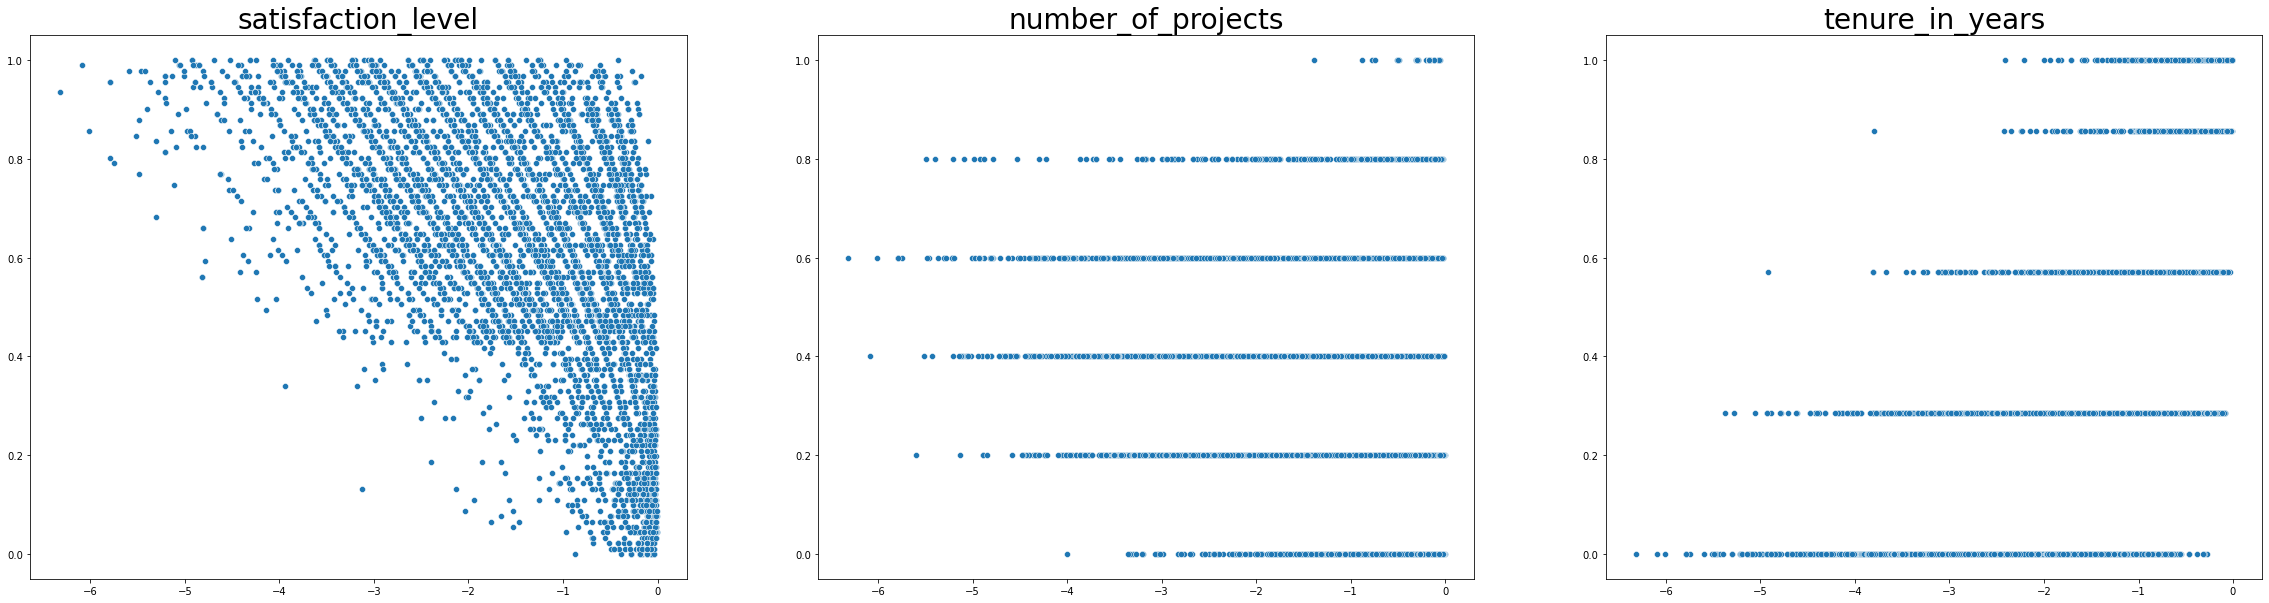

In [81]:
fig, axes=plt.subplots(1,3, figsize=(40,10))
ax0=sns.scatterplot(
    x=logits,
    y=X_tr[:,0],
    ax=axes[0]
)
ax1=sns.scatterplot(
    x=logits,
    y=X_tr[:,1],
    ax=axes[1]
)
ax2=sns.scatterplot(
    x=logits,
    y=X_tr[:,2],
    ax=axes[2]
)
ax0.set_title('satisfaction_level', fontsize=28)
ax1.set_title('number_of_projects', fontsize=28)
ax2.set_title('tenure_in_years', fontsize=28)
plt.show();

> ***Satisfaction Level:***  
* *The scatterplot for “satisfaction level” shows a non-linear pattern. This suggests that the relationship between satisfaction level and the logit is not strictly linear.*  

> ***Number of Projects:***  
* *In the scatterplot for “number of projects,” data points are clustered horizontally in distinct rows. There is no clear linear or non-linear trend.*    

> ***Tenure in Years:***  
* *Similar to the “number of projects,” the data points for “tenure in years” are also clustered horizontally. Again, there is no evident linear or non-linear relationship.*

💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



> ***Which independent variables did you choose for the model and why?***  
* *'satisfaction_level', 'tenure_in_years', 'number_of_projects', 'work_accident', 'salary' and 'high_workload'. I chose these variables because based on the model coefficients they have high importance on prediction results and less bias compared to other variables;*  

> ***Are each of the assumptions met?***  
* *only the 'linearity' assumption is not met;*  

> ***How well does your model fit the data?***  
* *recall score is great, but precision is quite low;*  

> ***Can you improve it? Is there anything you would change about the model?***  
* *using GridSearch to tune hyperparameters didn't improve the scores. Aside from using different algorithm I don't see a way to improve the model;*  

> ***What resources do you find yourself using as you complete this stage?***  
* *sklearn official documentation and stackoverflow;*  

> ***Do you have any ethical considerations in this stage?***  
* *no ethical considerations in this stage.*

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [82]:
logreg_best=LogisticRegression(random_state=42, class_weight='balanced')

In [83]:
minmax=normalizer(X_train)

In [84]:
logreg_best.fit(minmax.transform(X_train), y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
get_metrics(
    logreg_best,
    'logreg_best',
    'test',
    minmax.transform(X_test),
    y_test
)

,logreg_best
set,test
recall,0.88191
precision,0.451737
f1,0.597447
accuracy,0.802835
roc_auc,0.834508
cm,"[[1575, 426], [47, 351]]"


In [86]:
cr=metrics.classification_report(
    y_test,
    logreg_best.predict(minmax.transform(X_test))
)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      2001
           1       0.45      0.88      0.60       398

    accuracy                           0.80      2399
   macro avg       0.71      0.83      0.73      2399
weighted avg       0.88      0.80      0.82      2399



In [87]:
feature_importance=rank_features(X, np.abs(logreg_best.coef_[0])).reset_index(drop=True)

In [88]:
round(feature_importance, 2)

,feature,importance
0,satisfaction_level,4.11
1,tenure_in_years,3.75
2,number_of_projects,2.30
3,work_accident,1.37
4,salary,1.25
5,high_workload,0.42


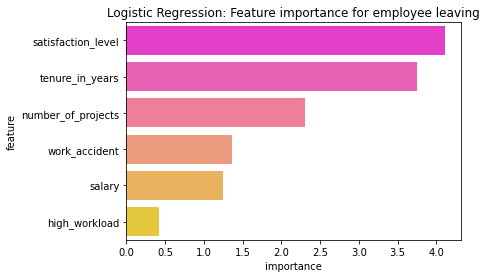

In [89]:
sns.barplot(
    data=feature_importance,
    y='feature',
    x='importance',
    palette='spring'#'cool_r'#'YlGn_r'
)
plt.title('Logistic Regression: Feature importance for employee leaving')
plt.show();

### Summary of model results

* *the final model showed 88% recall and 45% precision on the test set. As the main objective of the company is to reduce turnover rate the model is quite good as it identifies the majority of potential turnovers;*  

### Conclusion, Recommendations, Next Steps

* *'satisfaction_level', 'tenure_in_years' and 'number_of_projects' are the most important features in predicting whether the employee will leave;*    

* *statistical tests show that 'satisfaction_level' of the employees that stayed is significantly higher compared to those who terminated. Thus the company should consider implementing policies to increase satisfaction level of employees;*  
* *the analysis showed that 5 years tenure is a critical point at which many of employees decide to leave. The company should develop special incentives for employees who are nearing this critical poine, either by promoting them or increasing their salaries;*  
* *as the number of projects goes above 4 the satisfaction level decreases and the turnover rate increases. Managers should better plan the employee workload to prevent their burndown by involving them in too many projects;*  

* *the model could be improved if provided additional variables, e.g. which employees left and which were laid off, actual salary numbers;*  

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.